In [1]:
#imports

import requests
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/stemmed.csv')
df.head()

,Unnamed: 0,subreddit,text,tokenized,no_stopwords,stemmed,length
0,0,1,Simple slow run. :),"['simple', 'slow', 'run']",simple slow run,simpl slow run,4
1,1,1,Made a mini snowboard on my 3d printer,"['made', 'a', 'mini', 'snowboard', 'on', 'my',...",made mini 3d printer,made a mini snowboard on my 3d printer,8
2,2,1,Advise for a Snowboard to Buy,"['advise', 'for', 'a', 'snowboard', 'to', 'buy']",advise buy,advis for a snowboard to buy,6
3,3,1,Here are the brackets for NST at Revelstoke. ...,"['here', 'are', 'the', 'brackets', 'for', 'nst...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,15
4,4,1,How to fall on boxes and rails?,"['how', 'to', 'fall', 'on', 'boxes', 'and', 'r...",fall boxes rails,how to fall on box and rail,7


In [3]:
df.shape

(9708, 7)

In [4]:
df=df.drop(columns='Unnamed: 0')
df.head()

,subreddit,text,tokenized,no_stopwords,stemmed,length
0,1,Simple slow run. :),"['simple', 'slow', 'run']",simple slow run,simpl slow run,4
1,1,Made a mini snowboard on my 3d printer,"['made', 'a', 'mini', 'snowboard', 'on', 'my',...",made mini 3d printer,made a mini snowboard on my 3d printer,8
2,1,Advise for a Snowboard to Buy,"['advise', 'for', 'a', 'snowboard', 'to', 'buy']",advise buy,advis for a snowboard to buy,6
3,1,Here are the brackets for NST at Revelstoke. ...,"['here', 'are', 'the', 'brackets', 'for', 'nst...",brackets nst revelstoke think matchups,here are the bracket for nst at revelstok what...,15
4,1,How to fall on boxes and rails?,"['how', 'to', 'fall', 'on', 'boxes', 'and', 'r...",fall boxes rails,how to fall on box and rail,7


In [5]:
df.isna().sum()

subreddit        0
text             0
tokenized        0
no_stopwords    37
stemmed         10
length           0
dtype: int64

# TFIDF on text

In [6]:
X = df['text']
y = df['subreddit']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=23)

In [8]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [9]:
pipe.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('nb', MultinomialNB())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'nb': MultinomialNB(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'nb__alpha': 1.0,
 'nb__class_prior': None,
 'nb__fit_prior': True}

In [10]:
pipe_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [11]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [12]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [13]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 5000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [14]:
# trying again because we were hitting the extreme end of our ranges
pipe_params2 = {
    'tvec__max_features': [5_000, 6_000, 7_000],
    'tvec__min_df': [1, 2],
    'tvec__max_df': [.8, .9],
    'tvec__ngram_range': [(1, 1)]
}

In [15]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params2, 
                  cv = 5) 

In [16]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.8, 0.9],
                         'tvec__max_features': [5000, 6000, 7000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 1)]})

In [17]:
gs.best_params_

{'tvec__max_df': 0.8,
 'tvec__max_features': 7000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1)}

In [18]:
gs.score(X_train, y_train)

0.8772146683147919

In [19]:
gs.score(X_test, y_test)

0.7713226205191595

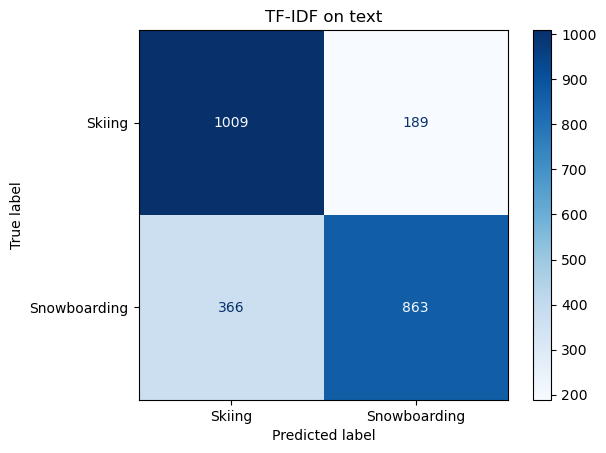

In [20]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap="Blues", display_labels=('Skiing', 'Snowboarding'))
plt.title("TF-IDF on text")
plt.savefig('../images/tfidf_text.png')

In [21]:
preds = gs.predict(X_test)

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [23]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensitivity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')

Specificity: 0.842237061769616
Sensitivity: 0.7021969080553295
Accuracy: 0.7713226205191595
Precision: 0.8203422053231939


# TFIDF on No Stopwords
(prettier confusion matric)

In [24]:
df.shape

(9708, 6)

In [25]:
df2=df[df['no_stopwords'].notnull()]
df2.shape

(9671, 6)

In [26]:
X = df2['no_stopwords']
y = df2['subreddit']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=23)

In [28]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
pipe_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [30]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [31]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [32]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [33]:
# trying again because we were hitting the extreme end of our ranges
pipe_params2 = {
    'tvec__max_features': [4_000],
    'tvec__min_df': [1, 2],
    'tvec__max_df': [.7, .8, .9],
    'tvec__ngram_range': [(1, 2)]
}

In [34]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params2, 
                  cv = 5) 

In [35]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.7, 0.8, 0.9],
                         'tvec__max_features': [4000], 'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 2)]})

In [36]:
gs.best_params_

{'tvec__max_df': 0.7,
 'tvec__max_features': 4000,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2)}

In [37]:
gs.score(X_train, y_train)

0.7902936715841721

In [38]:
gs.score(X_test, y_test)

0.6645988420181969

In [39]:
print(f"Training Accuracy: {gs.score(X_train, y_train)}")
print(f"Testing Accuracy: {gs.score(X_test, y_test)}")

Training Accuracy: 0.7902936715841721
Testing Accuracy: 0.6645988420181969


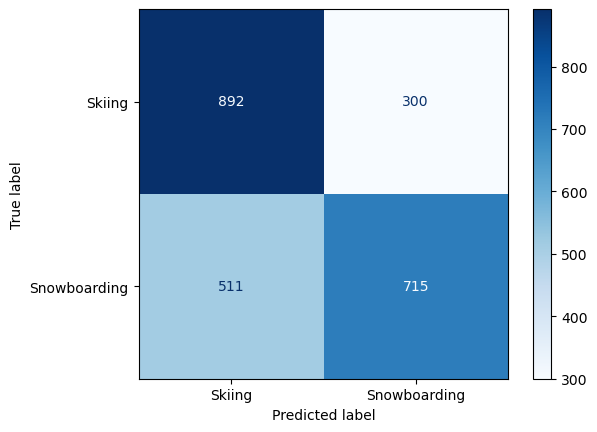

In [40]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap="Blues", display_labels=('Skiing', 'Snowboarding'))

In [41]:
preds = gs.predict(X_test)

In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [43]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensitivity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')


Specificity: 0.7483221476510067
Sensitivity: 0.5831973898858075
Accuracy: 0.6645988420181969
Precision: 0.7044334975369458


In [44]:
preds = gs.best_estimator_.predict(X_test)
print('Confusion Matrix')
print(pd.DataFrame(confusion_matrix(y_test, preds), index=['Actual Ski', 'Actual Snowboard'], columns=['Predicted Ski', 'Predicted Snowboard']))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()


Confusion Matrix
                  Predicted Ski  Predicted Snowboard
Actual Ski                  892                  300
Actual Snowboard            511                  715


In [45]:
tn

892

In [46]:
# Print Number of TN, FP, FN, TP
lr_cvec_tn = tn
print(f"True Negatives: {tn}")
lr_cvec_fp = fp
print(f"False Positives: {fp} ")
lr_cvec_fn = fn
print(f"False Negatives: {fn}")
lr_cvec_tp = tp
print(f"True Positives: {tp}")



True Negatives: 892
False Positives: 300 
False Negatives: 511
True Positives: 715


# Feature importance on TFIDF no stopwords

In [47]:
feature_names = gs.best_estimator_.named_steps['tvec'].get_feature_names()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
coef= gs.best_estimator_.named_steps['nb'].coef_.flatten()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [49]:
#Let's make it look nice!
df_plot = pd.DataFrame({'feature_names':feature_names,
                   'feature_importance':coef})

#Sort the DataFrame in order decreasing feature importance
df_plot.sort_values(by=['feature_importance'], ascending=False,inplace=True)
df_plothead=df_plot.head(15).copy()

In [50]:
df_plothead

,feature_names,feature_importance
2357,new,-5.253905
1301,first,-5.265708
1612,help,-5.532555
660,burton,-5.607539
523,bindings,-5.639864
594,boots,-5.734076
993,day,-5.759984
3512,time,-5.781998
207,advice,-5.784805
304,anyone,-5.827140


<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

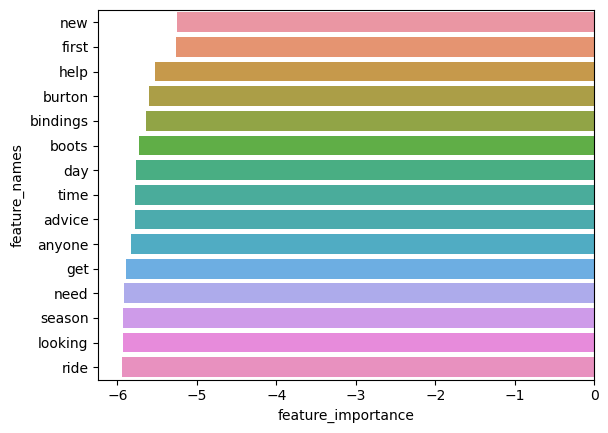

In [51]:
sns.barplot(x= df_plothead['feature_importance'], y=df_plothead['feature_names'])

# TFIDF on stemmed

In [52]:
df3=df[df['stemmed'].notnull()]
df3.shape

(9698, 6)

In [53]:
X = df3['stemmed']
y = df3['subreddit']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=23)

In [55]:
pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [56]:
pipe_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'tvec__ngram_range': [(1, 1), (1, 2)]
}

In [57]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params, 
                  cv = 5) 

In [58]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [59]:
gs.best_params_

{'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [60]:
# trying again because we were hitting the extreme end of our ranges
pipe_params2 = {
    'tvec__max_features': [5_000, 6_000, 7_000],
    'tvec__min_df': [1,2],
    'tvec__max_df': [.8, .9],
    'tvec__ngram_range': [(1, 2)]
}

In [61]:
gs = GridSearchCV(pipe, 
                  param_grid = pipe_params2, 
                  cv = 5) 

In [62]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_df': [0.8, 0.9],
                         'tvec__max_features': [5000, 6000, 7000],
                         'tvec__min_df': [1, 2],
                         'tvec__ngram_range': [(1, 2)]})

In [63]:
gs.best_params_

{'tvec__max_df': 0.8,
 'tvec__max_features': 7000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [64]:
gs.score(X_train, y_train)

0.861405197305101

In [65]:
gs.score(X_test, y_test)

0.7711340206185567

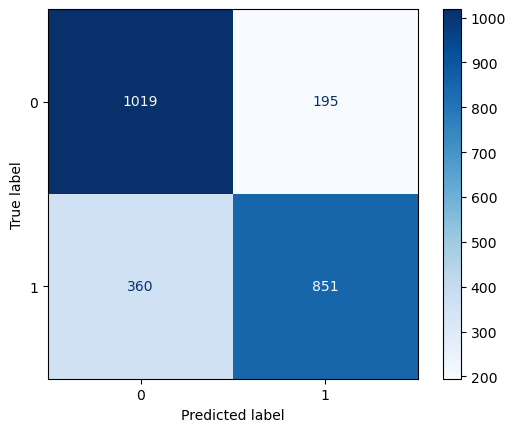

In [66]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap="Blues")

In [67]:
preds = gs.predict(X_test)

In [68]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [69]:
spec = tn / (tn + fp)

sens = tp / (tp + fn)

acc = (tp+tn) / (tp + tn+ fn+fp)

prec = tp/ (tp+fp)

print(f'Specificity: {spec}')

print(f'Sensitivity: {sens}')

print(f'Accuracy: {acc}')

print(f'Precision: {prec}')

Specificity: 0.8393739703459637
Sensitivity: 0.7027250206440958
Accuracy: 0.7711340206185567
Precision: 0.8135755258126195
